本题针对房产交易双方，利用真实成交数据，从房地产交易维度对交易参与人进行评价，计算个人房产信用评分。

**字段说明**：
- USER_ID：购房人ID
- Age：	年龄
- Sex：	性别
- TEL_ID：	电话归属地
- Province：	省份
- NATIONALITY：	国籍
- HOU_ID：	房屋编号
- Property_ID：	房屋属性 0：存量房、1：商品房、
- Property_Usage_Type：	房屋用途 0；住宅、1：非住宅
- Property_Architectural_Area：	建筑面积
- Property_Sign_Date：	网签时间
- Property_Record_Date：	备案时间
- Property_Price：	房屋成交总价
- Property_Loan_Way：	贷款方式
- Property_Payment：	付款方式
- CFCS	查封次数：
- JFCS	解封次数：
- Purchase_houcs：	历史买房次数
- Sale_houcs：	历史卖房次数
- Mortgage_starttime：	抵押开始时间
- Mortgage_endtime：	抵押结束时间


## 1 加载数据

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
pd.set_option('display.max_columns',100)

In [2]:
data=pd.read_csv('data/credit_pri_data.csv')
data.shape

(117919, 21)

In [3]:
data.head()

,USER_ID,AGE,SEX,TEL_ID,PROVINCE,NATIONALITY,HOU_ID,PROPERTY_ID,PROPERTY_USAGE_TYPE,PROPERTY_ARCHITECTURAL_AREA,PROPERTY_SIGN_DATE,PROPERTY_RECORD_DATE,PROPERTY_PRICE,PROPERTY_LOAN_WAY,PROPERTY_PAYMENT,CFCS,JFCS,Mortgage_starttime,Mortgage_endtime,Purchase_houcs,Sale_houcs
0,553081,2.0,0.0,0,33,1,110699851,1,1,0,2018/04,2018/04,0,3,3,NaN,NaN,NaN,NaN,2.0,1.0
1,620729,2.0,1.0,0,33,1,110699851,1,1,0,2018/04,2018/04,0,3,3,NaN,NaN,NaN,NaN,2.0,1.0
2,473511,4.0,0.0,0,61,1,110805321,1,1,2,2018/04,2018/04,3,5,2,NaN,NaN,NaN,NaN,2.0,NaN
3,700187,4.0,1.0,0,33,1,110805321,1,1,2,2018/04,2018/04,3,5,2,NaN,NaN,NaN,NaN,1.0,1.0
4,172276,4.0,0.0,0,33,1,110165121,1,1,0,2018/03,2018/03,1,5,1,NaN,NaN,NaN,NaN,1.0,NaN


统计每个字段空值个数

In [4]:
data.isnull().sum()

USER_ID                             0
AGE                                68
SEX                             24745
TEL_ID                              0
PROVINCE                            0
NATIONALITY                         0
HOU_ID                              0
PROPERTY_ID                         0
PROPERTY_USAGE_TYPE                 0
PROPERTY_ARCHITECTURAL_AREA         0
PROPERTY_SIGN_DATE                  0
PROPERTY_RECORD_DATE                0
PROPERTY_PRICE                      0
PROPERTY_LOAN_WAY                   0
PROPERTY_PAYMENT                    0
CFCS                           117634
JFCS                           117649
Mortgage_starttime             110682
Mortgage_endtime               110682
Purchase_houcs                      2
Sale_houcs                     102055
dtype: int64

数值型数据的基本统计

In [5]:
data.describe()

,USER_ID,AGE,SEX,TEL_ID,PROVINCE,NATIONALITY,HOU_ID,PROPERTY_ID,PROPERTY_USAGE_TYPE,PROPERTY_ARCHITECTURAL_AREA,PROPERTY_PRICE,PROPERTY_LOAN_WAY,PROPERTY_PAYMENT,CFCS,JFCS,Purchase_houcs,Sale_houcs
count,117919.000000,117851.000000,93174.000000,117919.000000,117919.000000,117919.000000,1.179190e+05,117919.0,117919.000000,117919.000000,117919.000000,117919.000000,117919.000000,285.000000,270.000000,117917.000000,15864.000000
mean,448101.192200,2.269858,0.495514,0.814949,33.647911,4.006471,4.989354e+08,1.0,0.221126,1.849990,1.436698,4.118310,2.695800,1.035088,1.059259,3.360567,1.857413
std,191807.006749,1.613968,0.499983,0.388340,4.868773,6.004428,3.359129e+08,0.0,0.415007,1.338169,1.504583,1.097807,1.448486,0.184325,0.350527,5.978858,3.831586
min,152364.000000,-1.000000,0.000000,0.000000,11.000000,1.000000,1.502600e+04,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,256074.500000,1.000000,0.000000,1.000000,33.000000,1.000000,1.093536e+08,1.0,0.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,473617.000000,2.000000,0.000000,1.000000,33.000000,1.000000,7.028562e+08,1.0,0.000000,2.000000,1.000000,5.000000,3.000000,1.000000,1.000000,2.000000,1.000000
75%,625533.500000,3.000000,1.000000,1.000000,33.000000,1.000000,8.078673e+08,1.0,0.000000,3.000000,2.000000,5.000000,3.000000,1.000000,1.000000,4.000000,2.000000
max,813147.000000,5.000000,1.000000,1.000000,71.000000,16.000000,8.125446e+08,1.0,1.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,207.000000,204.000000


<center>**--个人基本信息--**</center>                                         

### 1.1 年龄分析

In [6]:
data['AGE']=data['AGE'].fillna(2.0)
data['AGE'].value_counts()

 2.0    29998
 3.0    23773
 1.0    18102
 4.0    14929
 0.0    13215
 5.0    12735
-1.0     5167
Name: AGE, dtype: int64

我们可以看到，年龄存在-1值，属于异常值，需要处理掉

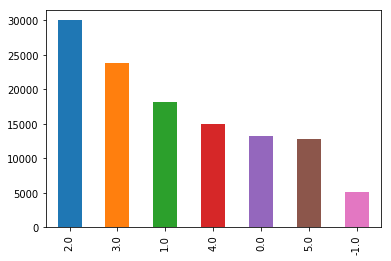

In [7]:
data['AGE'].value_counts().plot(kind='bar')
plt.show()

### 1.2 性别分析
按照0-1表示：0:男、1:女

In [8]:
data['SEX'].value_counts()

0.0    47005
1.0    46169
Name: SEX, dtype: int64

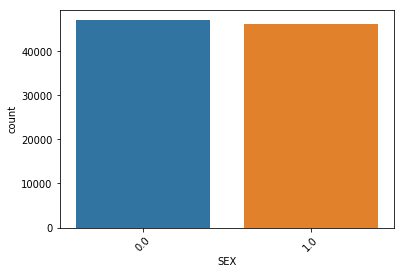

In [9]:
g=sns.countplot(x='SEX',data=data)
g = plt.setp(g.get_xticklabels(), rotation=45) 

我们从前面知道年龄有2万多条为空值，在这里看到男女比例基本一样，我们可以将年龄缺失值随机用0,1填充或者去除这些空值行，或者不选去性别这个特征

### 1.3 电话归属地

按照0-1表示：0:浙江省、1:其他

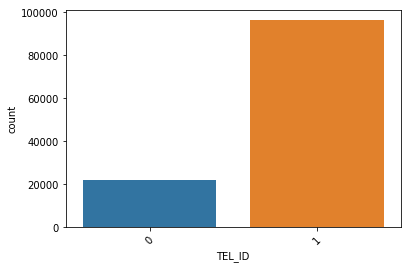

In [10]:
g=sns.countplot(x='TEL_ID',data=data)
g = plt.setp(g.get_xticklabels(), rotation=45) 

从上图可以看出，这一个区别性比较大的特征

### 1.4 省份分析
33 代表浙江省

In [11]:
data['PROVINCE'].value_counts()

33    93990
34     4305
36     3154
41     2412
32     2031
42     1768
37     1230
23     1087
43     1038
51      911
35      872
22      554
21      537
13      522
61      473
14      415
31      333
62      292
15      281
44      251
52      249
65      238
11      209
45      195
50      187
53      126
64       83
12       77
63       55
46       42
71        1
54        1
Name: PROVINCE, dtype: int64

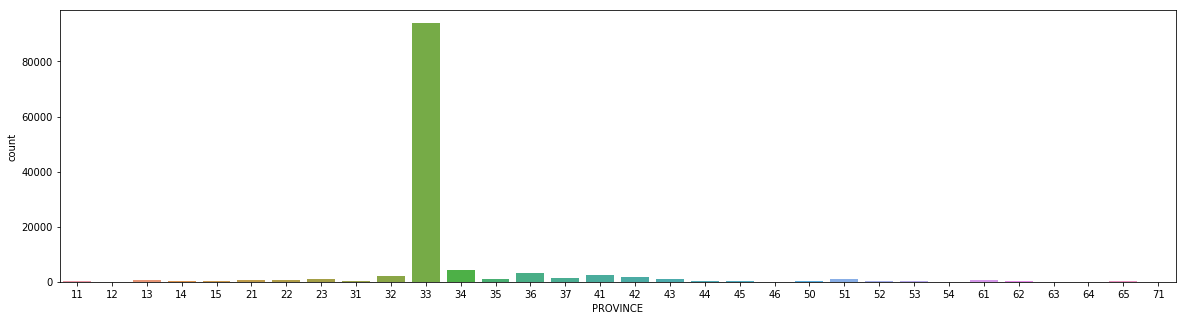

In [12]:
fig=plt.figure(figsize=(20,5))
g=sns.countplot(x='PROVINCE',data=data)

### 1.5 国籍

1-中国 16-特殊情况 9-法国 2-美国

In [13]:
data['NATIONALITY'].value_counts()

1     94275
16    23629
9        10
2         5
Name: NATIONALITY, dtype: int64

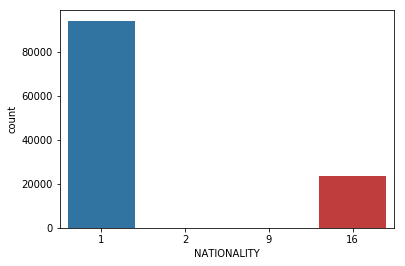

In [14]:
g=sns.countplot(x='NATIONALITY',data=data)

<center>**房屋基本情况**</center> 

### 1.6 房屋属性
Property_ID： 房屋属性 0：存量房、1：商品房、

In [16]:
data['PROPERTY_ID'].value_counts()

1    117919
Name: PROPERTY_ID, dtype: int64

我们可以看到房屋属性全部为商品房，所有值都为1，因此这个特征不必作为我们模型特征

### 1.7 房屋用途

枚举值，按照0-1表示：
0；住宅、1：非住宅


In [19]:
data['PROPERTY_USAGE_TYPE'].value_counts()

0    91844
1    26075
Name: PROPERTY_USAGE_TYPE, dtype: int64

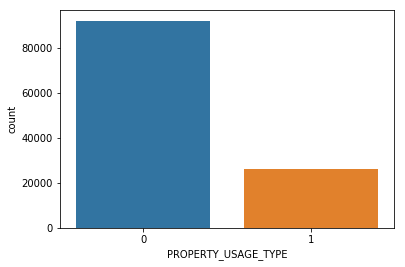

In [20]:
g=sns.countplot(x='PROPERTY_USAGE_TYPE',data=data)

### 1.8 房屋建筑面积

枚举值，按照0-4表示：

0:小于60平方米、1:60-90平方米、2:90-120平方米、3:120-140平方米、4:大于140平方米


In [21]:
data['PROPERTY_ARCHITECTURAL_AREA'].value_counts()

1    33528
3    25485
0    21761
2    20207
4    16938
Name: PROPERTY_ARCHITECTURAL_AREA, dtype: int64

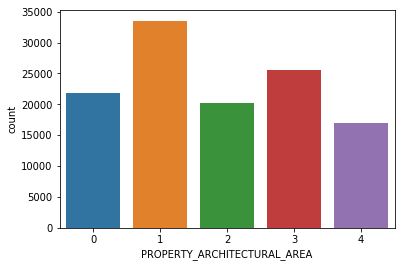

In [22]:
g=sns.countplot(x='PROPERTY_ARCHITECTURAL_AREA',data=data)

我们可以看到房屋面积在60-90最多，其次120-140平方米

### 1.9 网签时间  备案时间
这个时间特征对用户的信用评估基本上没有贡献，可以忽律

<center>**房屋基本情况**</center> 

### 1.10  房屋成交总价
枚举值，按照0-5表示：
0:100万以下、1:100-200万、2:200-300万、3:300-400万、4:400-500万、5:500万以上


In [23]:
data['PROPERTY_PRICE'].value_counts()

0    38978
1    35575
2    19908
5     9232
3     9041
4     5185
Name: PROPERTY_PRICE, dtype: int64

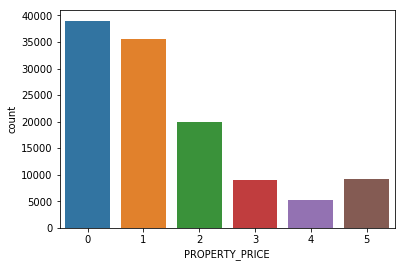

In [24]:
g=sns.countplot(x='PROPERTY_PRICE',data=data)

我们可以看到房屋成交总价基本上以低价为主，高价房较少

### 1.11 贷款方式 

枚举值，按照1-5表示：
1:组合贷款、2公积金贷款、3:商业贷款、4、银行贷款5、其他


In [26]:
data['PROPERTY_LOAN_WAY'].value_counts()

5    67174
3    40300
4     5724
1     3481
2     1240
Name: PROPERTY_LOAN_WAY, dtype: int64

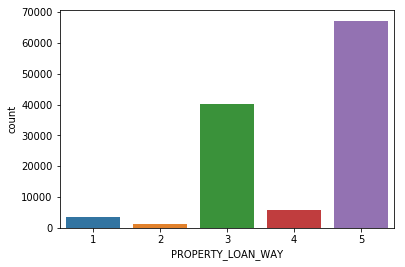

In [31]:
g=sns.countplot(x='PROPERTY_LOAN_WAY',data=data)

### 1.12 付款方式

枚举值，按照0-3表示：
1:一次性付款、2:分期付款、3:抵押贷款、4：其他方式、5：其他情况


In [32]:
data['PROPERTY_PAYMENT'].value_counts()

3    51455
1    40315
5    23636
2     2513
Name: PROPERTY_PAYMENT, dtype: int64

([<matplotlib.axis.XTick at 0x1bdb674b9b0>,
 <a list of 4 Text xticklabel objects>)

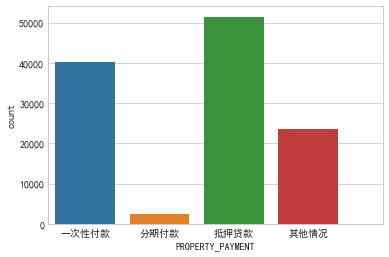

In [38]:
g=sns.countplot(x='PROPERTY_PAYMENT',data=data)
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.xticks(range(5),['一次性付款','分期付款','抵押贷款','其他情况'])

### 1.13 查封次数

整数型

In [43]:
# 统计下空值
data['CFCS'].isnull().sum(),data['CFCS'].isnull().sum()/len(data)

(117634, 0.9975830866951043)

我们可以看到空值有很多，接近有99.7%，基本用户不存在查封记录

In [48]:
data['CFCS'].fillna(0,inplace=True)

In [49]:
data['CFCS'].value_counts()

0.0    117634
1.0       275
2.0        10
Name: CFCS, dtype: int64